In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [36]:
fraud = pd.read_csv('/Users/salilketkar/thinkful/DS_Unit3/creditcard.csv')
fraud.head()
print(fraud.shape)

(284807, 31)


In [37]:
#dealing with class imbalance by sampling the overrepresented class in the same amount as the underrepresented.
#new

count_class_0, count_class_1 = fraud.Class.value_counts()
fraud_0 = fraud[fraud['Class'] == 0]
fraud_1 = fraud[fraud['Class'] == 1]

fraud_class_0_under = fraud_0.sample(count_class_1)
fraud_test_under = pd.concat([fraud_class_0_under,fraud_1],axis=0)

target = fraud_test_under.Class
data = fraud_test_under.iloc[:,1:30]

In [38]:
#running ttest to determine which variables are significantly different from class 0 and 1.  Dataset was further 
#reduced to 23 columns instead of the original 29.  

from scipy.stats import ttest_ind

newcol = []
for col in data.columns:
    test = ttest_ind(fraud_1[col], fraud_class_0_under[col],equal_var=False)
    
    if test[1] > 0.05:
        newcol.append(col)

data.drop(newcol, axis=1, inplace=True)

In [39]:
#splitting data and target into test and train

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

#### Establishing parameters for Logistic Regression

In [40]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(C=1)
lr.fit(X_train, y_train)
print('Coefficients:',lr.coef_)
print('R-squared for train model:',lr.score(X_train, y_train))
print('R-squared for test model:',lr.score(X_test, y_test))
cross_val_score(lr, data, target, cv=8)


Coefficients: [[ 0.1149445   0.12504698 -0.00856337  0.76828099  0.35366017 -0.30796665
  -0.16247972 -0.0318005  -0.43407662  0.36536777 -0.65250469 -0.9575155
  -0.32326876 -0.19610436 -0.21632129  0.11483549 -1.04424799  0.07314175
  -0.0236481   0.21705986  0.65530975  0.41428325  0.00574638]]
R-squared for train model: 0.9555273189326556
R-squared for test model: 0.9390862944162437


array([0.95967742, 0.96774194, 0.90322581, 0.90322581, 0.96721311,
       0.95901639, 0.94262295, 0.91803279])

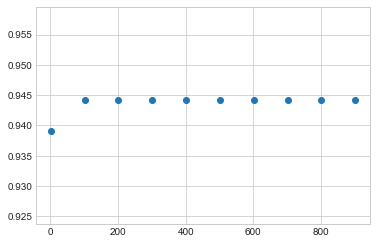

In [41]:
logTest = []
for C in range(1,1000,100):
    lr = LogisticRegression(C=C)
    lr.fit(X_train, y_train)
    logscore = lr.score(X_test, y_test)
    logTest.append(logscore)

sns.set_style('whitegrid')
plt.scatter(range(1,1000,100), logTest)
plt.show()

#### Establishing parameters for KNN model 

In [42]:
neighbors = KNeighborsClassifier(n_neighbors=1)
neighbors.fit(X_train, y_train)
print('R-squared for train model:',neighbors.score(X_train, y_train))
print('R-squared for test model:',neighbors.score(X_test, y_test))
cross_val_score(neighbors, data, target, cv=8)

R-squared for train model: 1.0
R-squared for test model: 0.8781725888324873


array([0.92741935, 0.91129032, 0.87903226, 0.87096774, 0.90983607,
       0.89344262, 0.90163934, 0.86885246])

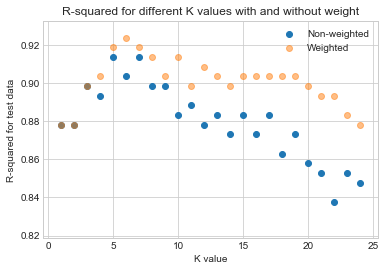

In [50]:
KNNTest = []
for n in range(1,25,1):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    KNNTest.append(knn.score(X_test, y_test))
KNNTestWeight = []
for n in range(1,25,1):
    knnWeight = KNeighborsClassifier(n_neighbors=n,weights='distance')
    knnWeight.fit(X_train, y_train)
    KNNTestWeight.append(knnWeight.score(X_test, y_test))

sns.set_style('whitegrid')
plt.scatter(range(1,25,1), KNNTest)
plt.scatter(range(1,25,1), KNNTestWeight,alpha=0.5)
plt.xlabel('K value')
plt.ylabel('R-squared for test data')
plt.legend(['Non-weighted','Weighted'],loc='best')
plt.title('R-squared for different K values with and without weight')
plt.show()


#### Establishing parameters for decision tree

In [8]:
dTree = DecisionTreeClassifier(
    criterion='entropy',
    max_features='auto',
    max_depth=4,
    )

dTree.fit(X_train, y_train)
print('R-squared for train model:',dTree.score(X_train, y_train))
print('R-squared for test model:',dTree.score(X_test, y_test))
cross_val_score(dTree, data, target, cv=8)

R-squared for train model: 0.9301143583227446
R-squared for test model: 0.8883248730964467


array([0.96774194, 0.96774194, 0.88709677, 0.87096774, 0.94262295,
       0.94262295, 0.8852459 , 0.90163934])

In [61]:
treeDepth = []
count = {}
for i in range(1,400,1):
    count_ = {}
    for n in range(1,20,1):
        tree = DecisionTreeClassifier(criterion='entropy',
        max_features='auto',
        max_depth=n,
        )
        tree.fit(X_train, y_train)
        treeDepth.append(tree.score(X_test, y_test))

        count_[n] = tree.score(X_test,y_test)
        
    maxaccuracy = max(count_.values())
    result = []
    for key in count_.keys():
        if count_[key] == maxaccuracy:
            result.append(key)
    for r in result:
        if r in count:
            count[r] +=1
        else:
            count[r]=1
            

In [68]:
count

{4: 49,
 10: 35,
 19: 16,
 3: 30,
 15: 25,
 2: 6,
 5: 47,
 13: 26,
 6: 49,
 9: 45,
 17: 23,
 7: 41,
 8: 53,
 16: 18,
 11: 29,
 14: 32,
 12: 22,
 18: 12}

#### Establishing parameters for Random Forest

In [151]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
print('R-squared for train model:',dTree.score(X_train, y_train))
print('R-squared for test model:',dTree.score(X_test, y_test))
cross_val_score(rfc, data, target, cv=8)

R-squared for train model: 0.9021601016518425
R-squared for test model: 0.8781725888324873


array([0.94354839, 0.95967742, 0.87903226, 0.88709677, 0.95081967,
       0.95901639, 0.91803279, 0.91803279])

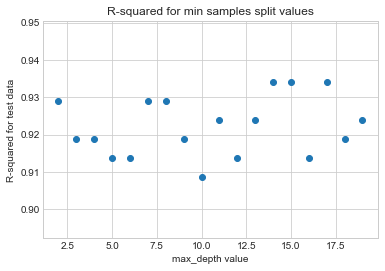

In [67]:
rfcDepth = []
for n in range(2,20,1):
    forest = RandomForestClassifier(n_estimators=100,criterion='entropy', max_features='auto',min_samples_split=n)
    forest.fit(X_train, y_train)
    rfcDepth.append(forest.score(X_test, y_test))

sns.set_style('whitegrid')
plt.scatter(range(2,20,1), rfcDepth)
plt.xlabel('max_depth value')
plt.ylabel('R-squared for test data')
plt.title('R-squared for min samples split values')
plt.show()

#### Establishing parameters for SVC

In [ ]:
svc = SVC()

svc.fit(X_train, y_train)
print('R-squared for train model:',svc.score(X_train, y_train))
print('R-squared for test model:',svc.score(X_test, y_test))
cross_val_score(svc, data, target, cv=8)

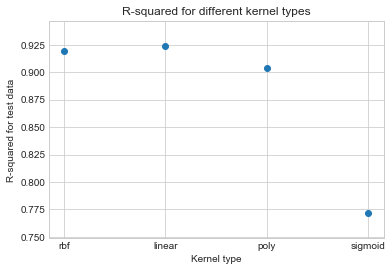

In [148]:
svcKernel = []
for n in ['rbf','linear','poly','sigmoid']:
    svc = SVC(kernel=n
    )
    svc.fit(X_train, y_train)
    svcKernel.append(svc.score(X_test, y_test))

sns.set_style('whitegrid')
plt.scatter(['rbf','linear','poly','sigmoid'], svcKernel)
plt.xlabel('Kernel type')
plt.ylabel('R-squared for test data')
plt.title('R-squared for different kernel types')
plt.show()

LR: 0.947120 (0.040524)
KNN: 0.917402 (0.065820)
Tree: 0.912377 (0.050751)
RFT: 0.939767 (0.045648)
SVM: 0.943015 (0.045015)


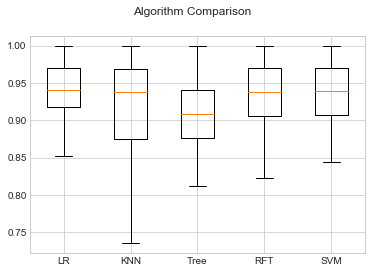

In [64]:
# prepare configuration for cross validation test harness
# prepare models max_depth=5
models = []
models.append(('LR', LogisticRegression(C=100)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=6,weights='distance')))
models.append(('Tree', DecisionTreeClassifier(criterion='entropy',
    max_features='auto', max_depth=6)))
models.append(('RFT', RandomForestClassifier(n_estimators=100,criterion='entropy', max_features='auto',min_samples_split=11)))
models.append(('SVM', SVC(kernel='linear')))
# evaluate each model in turn
results = []
names = []
#scoring = 'accuracy'
for name, model in models:    
    cv_results = model_selection.cross_val_score(model.fit(X_train, y_train), data, target, cv=30 , scoring='accuracy')
    results.append(cv_results)
    names.append(name)    
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [69]:
from sklearn.ensemble import VotingClassifier

estimators = []

estimators.append(('LR', LogisticRegression(C=100)))
estimators.append(('KNN', KNeighborsClassifier(n_neighbors=6,weights='distance')))
estimators.append(('Tree', DecisionTreeClassifier(criterion='entropy',
    max_features='auto', max_depth=6)))
estimators.append(('RFT', RandomForestClassifier(n_estimators=100,criterion='entropy', max_features='auto',min_samples_split=11)))
estimators.append(('SVM', SVC(kernel='linear')))


In [70]:
es = VotingClassifier(estimators)
es.fit(X_train,y_train)
es.score(X_test, y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9289340101522843

I have chosen logistic regression beacuse it gives the highest accuracy along with the lowest variance.  

In [71]:
lr = LogisticRegression(C=100)
lr.fit(X_train, y_train)
print('Coefficients:',lr.coef_)
print('R-squared for train model:',lr.score(X_train, y_train))
print('R-squared for test model:',lr.score(X_test, y_test))
cross_val_score(lr, data, target, cv=8)


Coefficients: [[-5.10027720e-01  8.42208643e-01 -2.22612472e+00  2.65358431e+00
  -1.04837607e+00 -9.71644800e-01 -3.46808718e+00 -2.06166261e+00
  -5.02772431e+00  3.40008803e+00 -6.06643747e+00 -6.57044325e+00
  -5.24579067e+00 -9.17994136e+00 -3.58740474e+00  1.36806476e+00
  -1.20593501e+00  6.68035394e-01 -6.70271393e-02  5.46909024e-01
   2.78521452e+00  6.27011292e-01  7.99801551e-03]]
R-squared for train model: 0.9567979669631512
R-squared for test model: 0.9441624365482234


array([0.96774194, 0.95967742, 0.91935484, 0.90322581, 0.97540984,
       0.94262295, 0.94262295, 0.93442623])